In [254]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
import numpy as np

In [255]:
ds = make_classification(random_state=23, n_informative=1, n_redundant=0, n_features=2, n_clusters_per_class=1,
                         class_sep=0.35)
df = pd.DataFrame(ds[0], columns=['first', 'second'])
df['res'] = ds[1]
df.head(15)

,first,second,res
0,-0.877640,-0.050418,1
1,0.090094,-0.384675,0
2,-0.615135,-0.606995,0
3,0.548788,-0.615522,0
4,-1.443831,0.347881,1
5,1.171796,0.377555,1
6,-0.190358,0.383421,1
7,-1.903515,0.259296,1
8,0.549310,-0.522888,0
9,0.123741,0.159226,1


<Axes: xlabel='first', ylabel='second'>

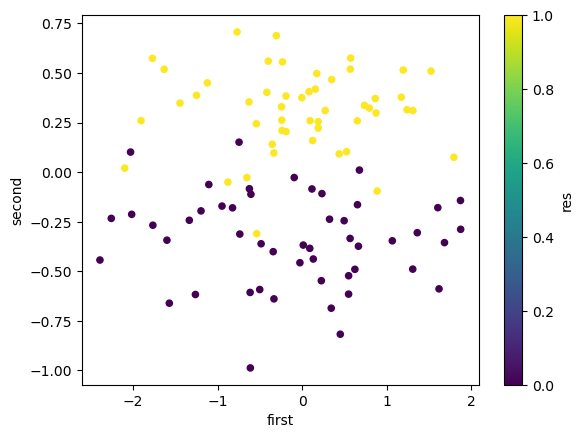

In [256]:
df.plot.scatter(x='first', y='second', c='res', colormap='viridis')

In [257]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(ds[0], ds[1])

<Axes: xlabel='first', ylabel='second'>

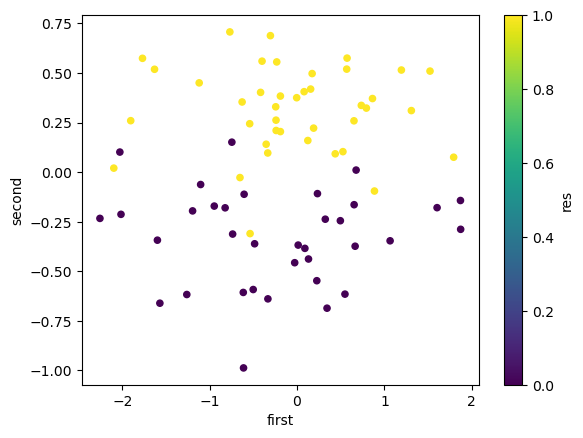

In [258]:
train_df = pd.DataFrame(x_train, columns=['first', 'second'])
train_df['res'] = y_train
train_df.plot.scatter(x='first', y='second', c='res', colormap='viridis')

<Axes: xlabel='first', ylabel='second'>

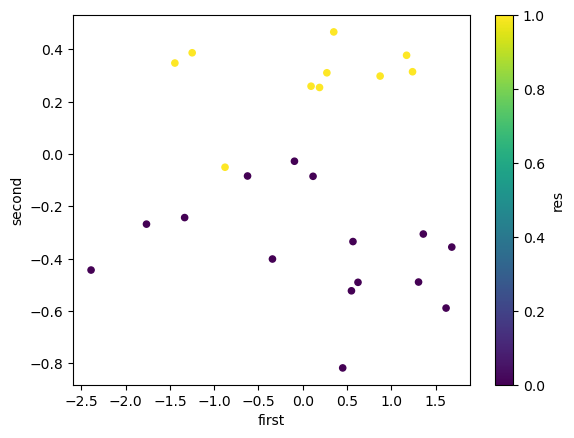

In [259]:
test_df = pd.DataFrame(x_test, columns=['first', 'second'])
test_df['res'] = y_test
test_df.plot.scatter(x='first', y='second', c='res', colormap='viridis')

In [260]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score
from sklearn.inspection import DecisionBoundaryDisplay

# метод взял с методички, он не работает, поэтому за основу взят готовый класс DecisionBoundaryDisplay
def plot_2d_separator(classifier, X, fill=False, line=True, ax=None, eps=None):
    if eps is None:
        eps = 1.0  #X.std() / 2.
    x_min, x_max = X[:, 0].min() - eps, X[:, 0].max() + eps
    y_min, y_max = X[:, 1].min() - eps, X[:, 1].max() + eps
    xx = np.linspace(x_min, x_max, 100)
    yy = np.linspace(y_min, y_max, 100)
    X1, X2 = np.meshgrid(xx, yy)
    X_grid = np.c_[X1.ravel(), X2.ravel()]
    try:
        decision_values = classifier.decision_function(X_grid)
        levels = [0]
        fill_levels = [decision_values.min(), 0, decision_values.max()]
    except AttributeError:
        # no decision_function
        decision_values = classifier.predict_proba(X_grid)[:, 1]
        levels = [.5]
        fill_levels = [0, .5, 1]

        if ax is None:
            ax = plt.gca()
        if fill:
            ax.contourf(X1, X2, decision_values.reshape(X1.shape), levels=fill_levels,
                        colors=['cyan', 'pink', 'yellow'])
        if line:
            ax.contour(X1, X2, decision_values.reshape(X1.shape), levels=levels, colors="black")
        ax.set_xlim(x_min, x_max)
        ax.set_ylim(y_min, y_max)
        ax.set_xticks(())
        ax.set_yticks(())


def show_statistic(clf, x_test, y_test):
    clf.fit(x_train, y_train)
    print(f"y_true: {y_test}")
    y_pred = clf.predict(x_test)
    print(f"y_pred: {y_pred}")
    cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=clf.classes_)
    disp.plot()
    # print("accuracy score: {:.2f}".format(accuracy_score(y_true=y_test, y_pred=y_pred)))
    # print("precision score: {:.2f}".format(precision_score(y_true=y_test, y_pred=y_pred)))
    # print("f1 score: {:.2f}".format(f1_score(y_true=y_test, y_pred=y_pred)))
    print(classification_report(y_test, y_pred, target_names=['first', 'second']))
    print("area under curve: {:.2f}".format(roc_auc_score(y_test, y_pred)))
    DecisionBoundaryDisplay.from_estimator(clf, x_test)
    # plt.xlabel("first feature")
    # plt.ylabel("second feature")
    # plot_2d_separator(clf, ds[0], fill=True)
    # plt.scatter(ds[0][0], ds[0][1], c=ds[1], s=70)

param = 1
y_true: [0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1]
y_pred: [0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1]
              precision    recall  f1-score   support

       first       0.93      0.93      0.93        15
      second       0.90      0.90      0.90        10

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25

area under curve: 0.92


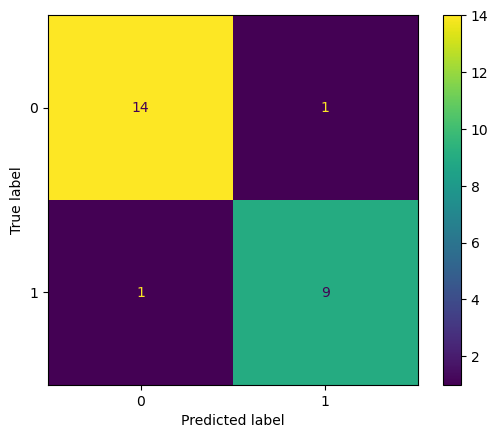

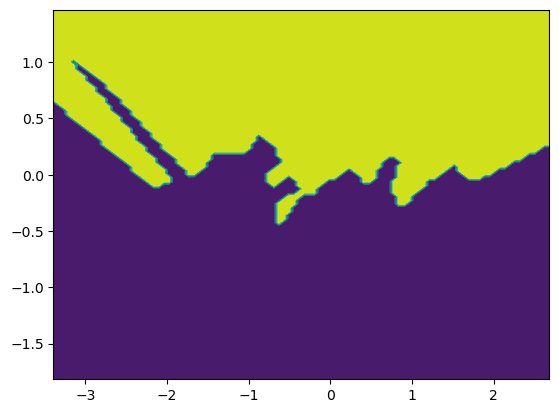

In [261]:
def test_KNeighthboursClassifier_hyper(hyperparams):
    for param in hyperparams:
        print(f"param = {param}")
        clf = KNeighborsClassifier(n_neighbors=param)
        show_statistic(clf, x_test, y_test)

test_KNeighthboursClassifier_hyper([1])

y_true: [0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1]
y_pred: [0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1]
              precision    recall  f1-score   support

       first       0.94      1.00      0.97        15
      second       1.00      0.90      0.95        10

    accuracy                           0.96        25
   macro avg       0.97      0.95      0.96        25
weighted avg       0.96      0.96      0.96        25

area under curve: 0.95


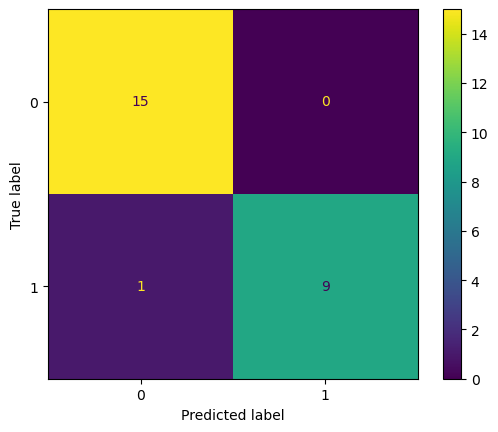

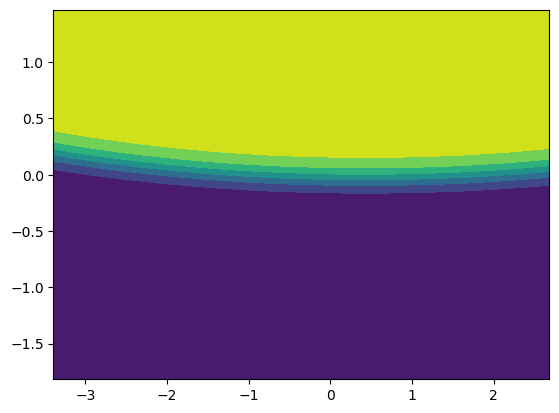

In [262]:
from sklearn.naive_bayes import GaussianNB

clf = GaussianNB()
clf.fit(x_train, y_train)
show_statistic(clf, x_test, y_test)

param = 5
y_true: [0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1]
y_pred: [0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 0 1]
              precision    recall  f1-score   support

       first       0.94      1.00      0.97        15
      second       1.00      0.90      0.95        10

    accuracy                           0.96        25
   macro avg       0.97      0.95      0.96        25
weighted avg       0.96      0.96      0.96        25

area under curve: 0.95


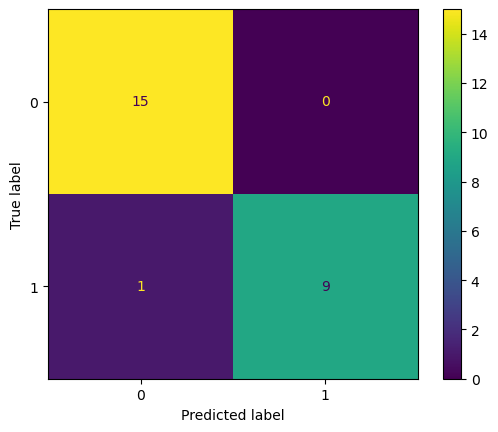

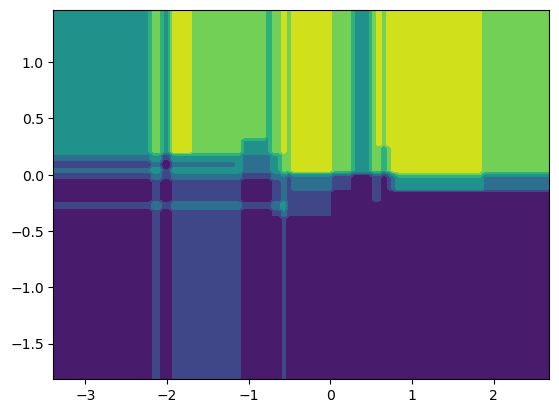

In [263]:
from sklearn.ensemble import RandomForestClassifier

def test_RandomForestClassifier_hyper(hyperparams):
    for param in hyperparams:
        print(f"param = {param}")
        clf = RandomForestClassifier(n_estimators=param)
        clf.fit(x_train, y_train)
        show_statistic(clf, x_test, y_test)

test_RandomForestClassifier_hyper([5])

# ГИПЕР ПАРАМЕТРЫ

param = 1
y_true: [0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1]
y_pred: [0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1]
              precision    recall  f1-score   support

       first       0.93      0.93      0.93        15
      second       0.90      0.90      0.90        10

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25

area under curve: 0.92
param = 3
y_true: [0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1]
y_pred: [0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1]
              precision    recall  f1-score   support

       first       0.93      0.93      0.93        15
      second       0.90      0.90      0.90        10

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25

area under curve: 0.92
param = 5
y_true: [0 1 0 0 1 0 1 0 1 1 0

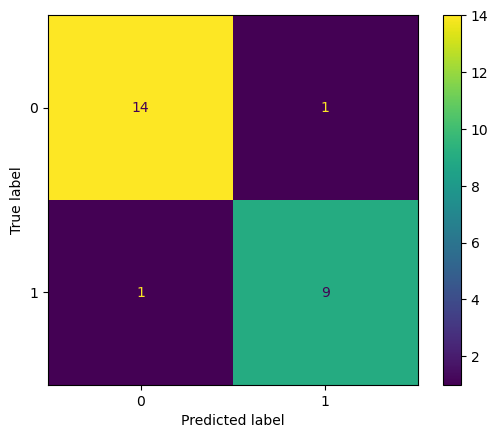

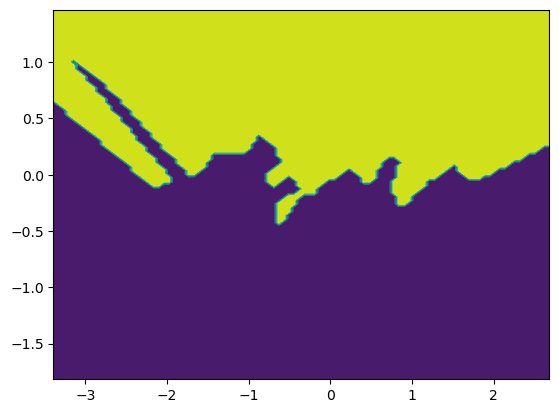

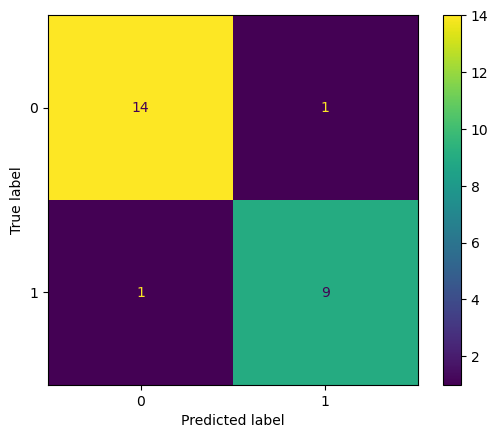

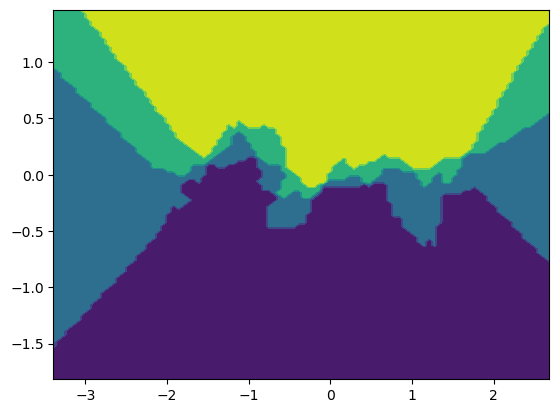

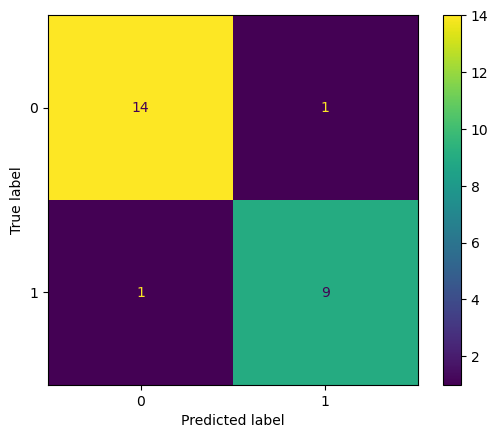

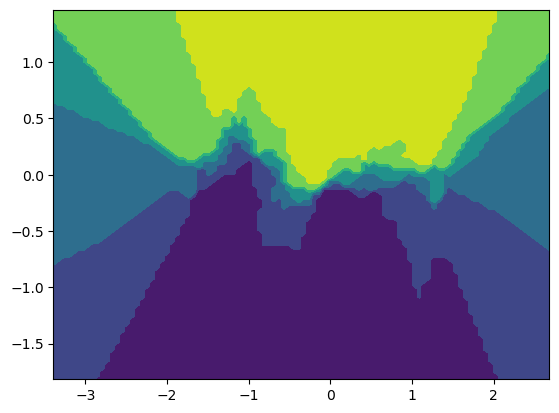

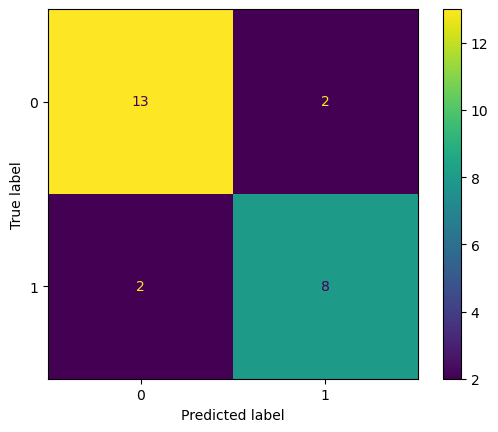

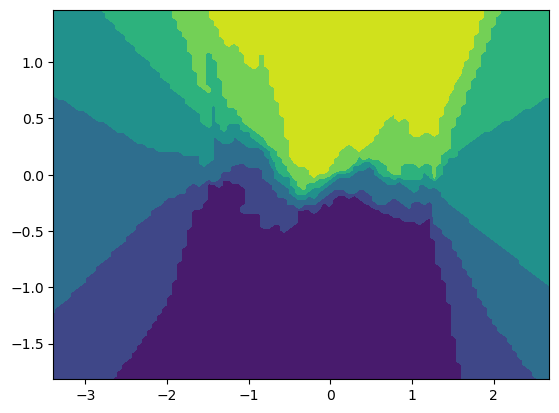

In [264]:
test_KNeighthboursClassifier_hyper([1, 3, 5, 9])

param = 5
y_true: [0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1]
y_pred: [0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1]
              precision    recall  f1-score   support

       first       1.00      1.00      1.00        15
      second       1.00      1.00      1.00        10

    accuracy                           1.00        25
   macro avg       1.00      1.00      1.00        25
weighted avg       1.00      1.00      1.00        25

area under curve: 1.00
param = 10
y_true: [0 1 0 0 1 0 1 0 1 1 0 0 0 0 0 1 0 1 0 0 1 0 0 1 1]
y_pred: [0 1 0 0 1 0 1 0 1 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0 1]
              precision    recall  f1-score   support

       first       0.93      0.93      0.93        15
      second       0.90      0.90      0.90        10

    accuracy                           0.92        25
   macro avg       0.92      0.92      0.92        25
weighted avg       0.92      0.92      0.92        25

area under curve: 0.92
param = 15
y_true: [0 1 0 0 1 0 1 0 1 1

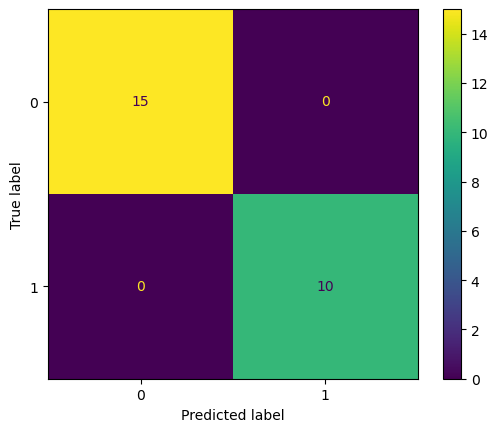

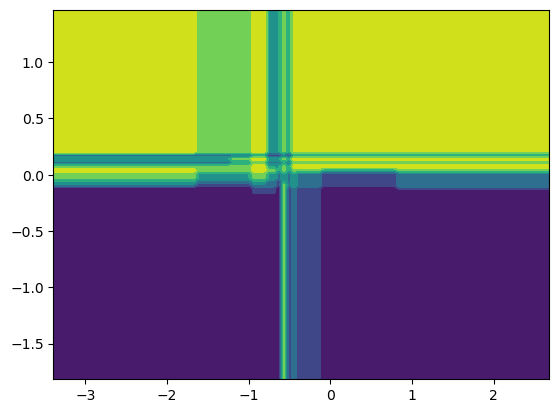

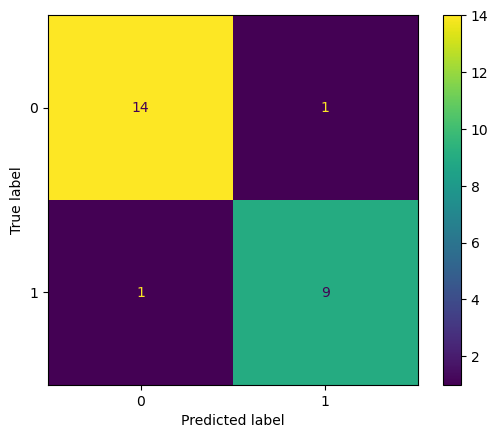

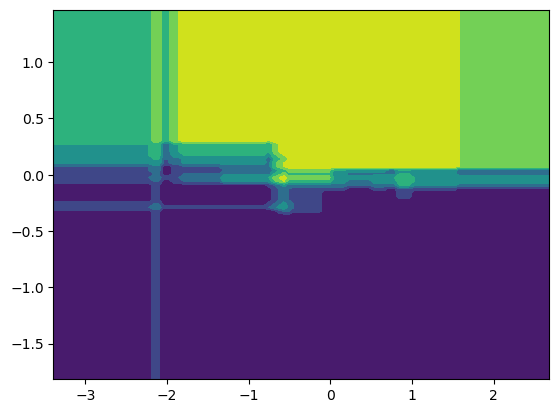

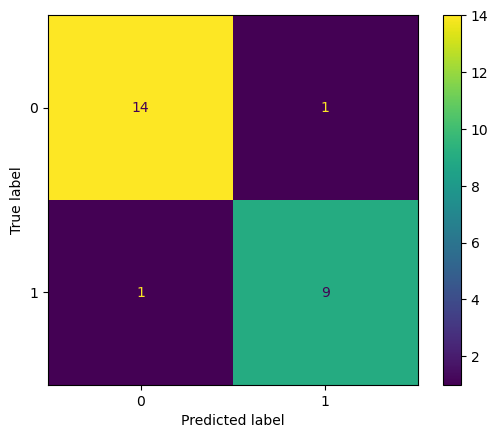

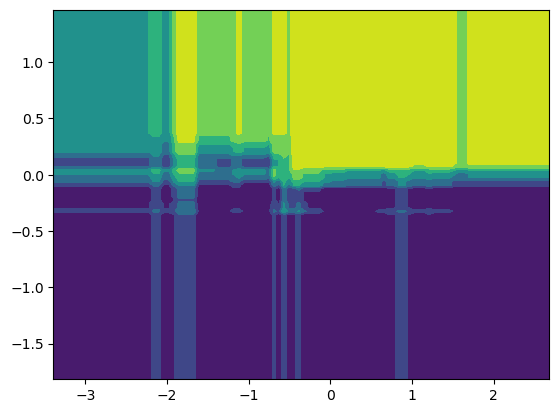

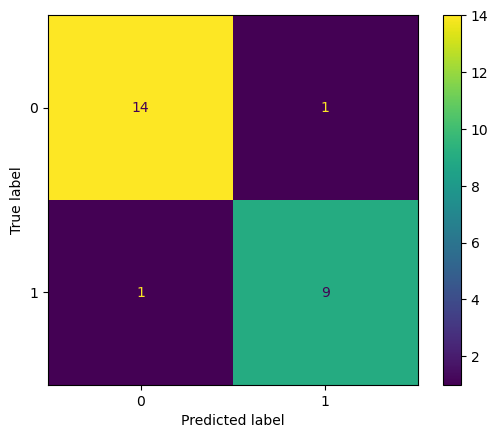

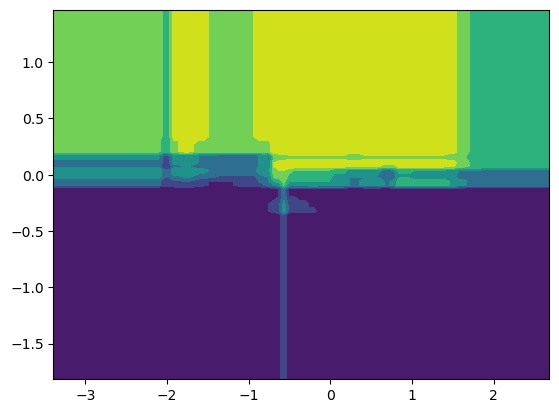

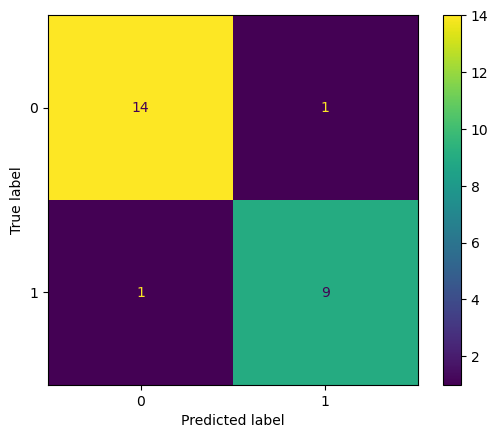

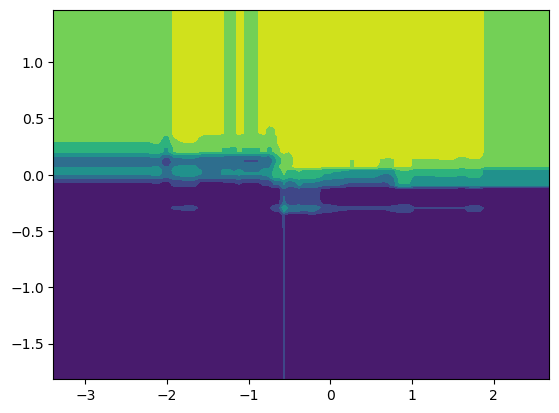

In [265]:
test_RandomForestClassifier_hyper([5, 10, 15, 20, 50])